### Librerias

In [12]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

### Ejercicio 3

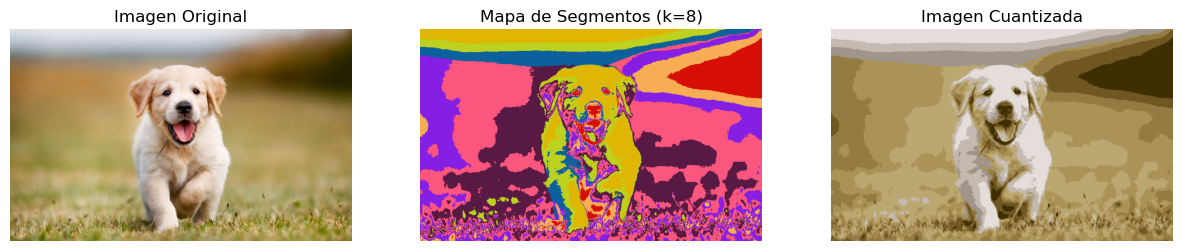

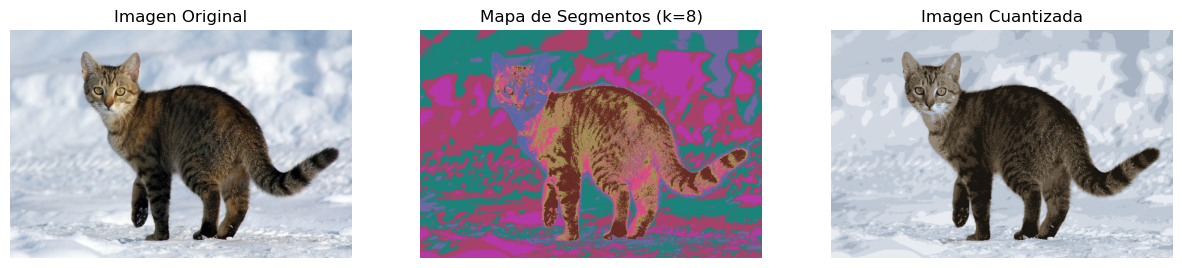

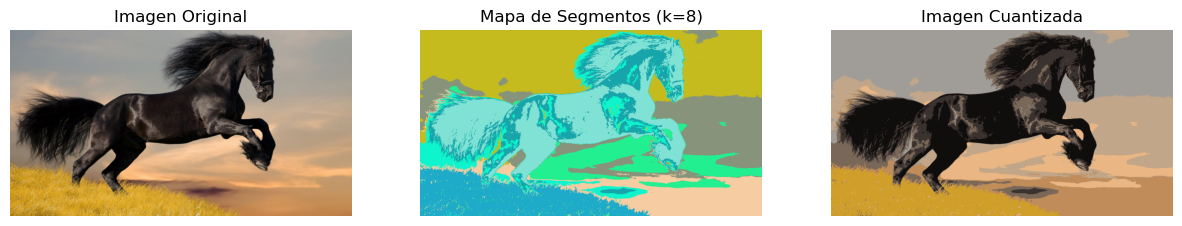

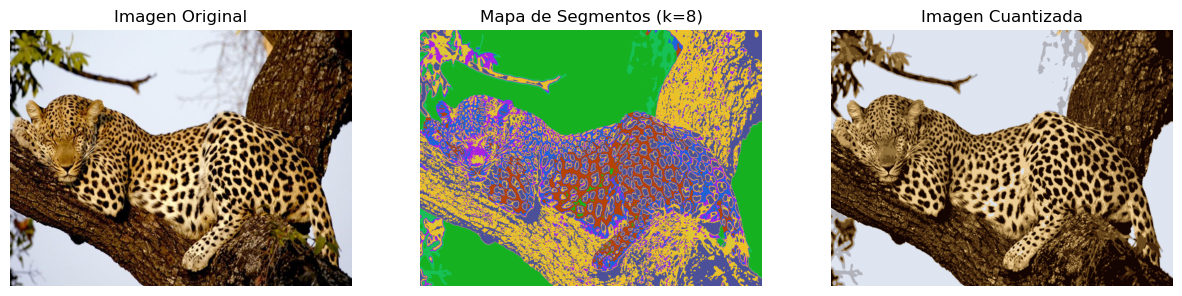

In [15]:
def segmentation(image, k):
    x, y, z = image.shape
    pixels = image.reshape((-1, 3))
    pixels = np.float32(pixels)

    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    
    _, labels, centers = cv2.kmeans(pixels, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    centers = np.uint8(centers)
    
    quantized_image = centers[labels.flatten()].reshape((x, y, z))
    
    labels_reshaped = labels.reshape((x, y))
    segment_map = np.zeros((x, y, 3), dtype=np.uint8)
    colors = np.random.randint(0, 255, (k, 3), dtype=np.uint8)
    
    for i in range(k):
        segment_map[labels_reshaped == i] = colors[i]

    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    axs[0].imshow(image)
    axs[0].set_title("Imagen Original")
    axs[0].axis("off")
    
    axs[1].imshow(segment_map)
    axs[1].set_title(f"Mapa de Segmentos (k={k})")
    axs[1].axis("off")
    
    axs[2].imshow(quantized_image)
    axs[2].set_title("Imagen Cuantizada")
    axs[2].axis("off")
    
    plt.show()

image_paths = [
    "./images/perro.jpg",
    "./images/gato.jpg",
    "./images/cab.png",
    "./images/leo.jpg"
]

images = []
for path in image_paths:
    img = cv2.imread(path)
    if img is None:
        raise FileNotFoundError(f"Archivo no encontrado: {path}")
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    images.append(img)

k = int(input("Ingrese el número de segmentos que desea utilizar: "))
while k < 2:
    k = int(input("Ingrese el número de segmentos que desea utilizar (mayor o igual a 2): "))

for img in images:
    segmentation(img, k)